In [1]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
date = "2025-06-05_16-35"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/scenario_exploration_experiments_{date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/scenario_exploration_outcomes_{date}.csv")

combined_df = pd.concat([experiments, outcomes], axis=1)

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [2]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,5.767770e+08,0,0.0,0.0,1.007189
1,9.659008e+08,0,0.0,0.0,0.730446
2,2.299171e+09,0,0.0,0.0,1.327463
3,1.280612e+09,0,0.0,0.0,0.972326
4,9.144279e+08,0,0.0,0.0,1.037154
...,...,...,...,...,...
9995,3.107938e+09,0,0.0,0.0,1.965330
9996,7.206839e+08,0,0.0,0.0,1.169453
9997,1.869231e+09,0,0.0,0.0,2.504472
9998,5.322598e+08,0,0.0,0.0,0.780084


In [3]:
df=pd.DataFrame(combined_df)

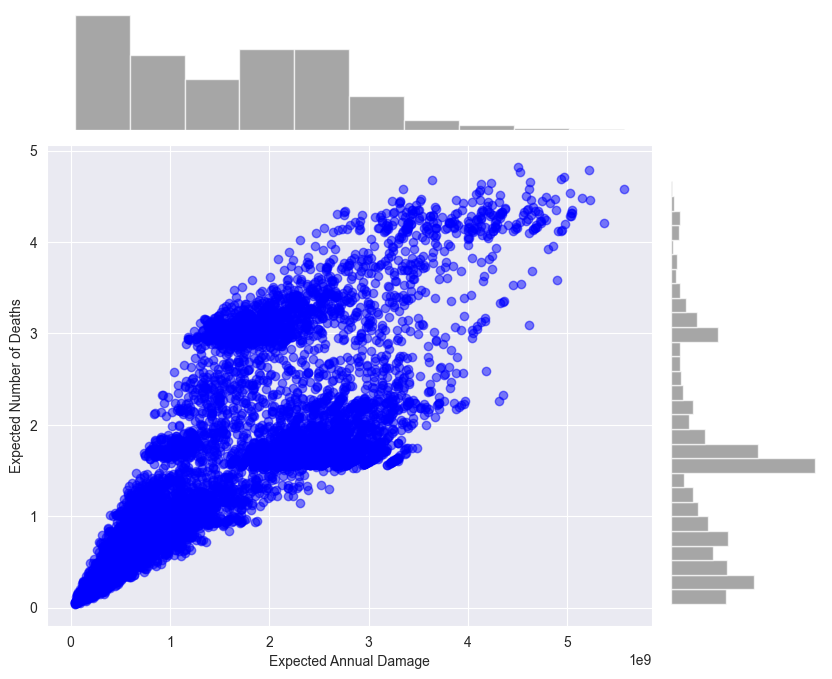

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a custom layout
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
ax_scatter.scatter(df['Expected Annual Damage'], df['Expected Number of Deaths'], c='blue', alpha=0.5)
ax_scatter.set_xlabel('Expected Annual Damage')
ax_scatter.set_ylabel('Expected Number of Deaths')
ax_scatter.grid(True)

# Histogram for RfR Total Costs
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_x.hist(df['Expected Annual Damage'], bins=10, color='gray', alpha=0.7)
ax_hist_x.axis('off')  # Hide axis labels for better aesthetics

# Histogram for Total Deaths
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_hist_y.hist(df['Expected Number of Deaths'], bins=30, orientation='horizontal', color='gray', alpha=0.7)
ax_hist_y.axis('off')  # Hide axis labels for better aesthetics

plt.show()

In [5]:
# [0,1] [0,1] Favourable scenario (damage, deaths)

# [5,] [4,] Very unfavourable scenario (damage, deaths)

# [2,3] [1,2] Medium favourable scenario (damage, deaths)

# [1.2, 2.2] [2.5, 3.5] Medium favourable scenario (damage, deaths)

# [4,5] [4,] Very unfavourable (damage, deaths)

In [6]:
import numpy as np
import pandas as pd

# Define the seed for reproducibility
np.random.seed(42)

# Define category-specific bounds
favourable_bounds = [
    [[0, 1], [0, 1]]
]

medium_bounds = [
    [[5, 10], [4, 10]],
    [[4, 5], [4, 10]]
]

unfavourable_bounds = [
    [[2, 3], [1, 2]],
    [[1.2, 2.2], [2.5, 3.5]]
]

# Function to filter and sample based on bounds
def filter_and_sample(bounds_list, combined_df):
    results = pd.DataFrame()
    for bound in bounds_list:
        mask = (
            (combined_df['Expected Annual Damage'] >= bound[0][0] * 1e9) &
            (combined_df['Expected Annual Damage'] <= bound[0][1] * 1e9) &
            (combined_df['Expected Number of Deaths'] >= bound[1][0]) &
            (combined_df['Expected Number of Deaths'] <= bound[1][1])
        )
        filtered = combined_df[mask].copy()
        if not filtered.empty:
            sampled = filtered.sample(n=min(2, len(filtered)), random_state=42)
            results = pd.concat([results, sampled], ignore_index=True)
        else:
            print(f"No outcomes found for bounds {bound}.")
    return results

# Apply to each category
favourable_scenarios_df = filter_and_sample(favourable_bounds, combined_df).iloc[:, :-39]
medium_scenarios_df = filter_and_sample(medium_bounds, combined_df).iloc[:, :-39]
unfavourable_scenarios_df = filter_and_sample(unfavourable_bounds, combined_df).iloc[:, :-39]

# # Save to CSV
# favourable_scenarios.to_csv("favourable_scenarios.csv", index=False)
# medium_scenarios.to_csv("medium_scenarios.csv", index=False)
# unfavourable_scenarios.to_csv("unfavourable_scenarios.csv", index=False)

print("Scenario CSVs have been saved.")

favourable_scenarios_df

Scenario CSVs have been saved.


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,94,296.443998,1.5,0.646671,281.840744,1.5,0.062350,227.032262,10.0,0.898867,259.908749,10.0,0.860574,126.944483,10.0,0.468412,3.5,3.5,3.5
1,126,269.080099,10.0,0.502042,40.550562,1.5,0.305364,73.725405,1.0,0.465398,55.044194,10.0,0.039080,42.552788,1.5,0.463305,1.5,3.5,1.5


In [7]:
### GEEN IDEE OF DEZE CODE NOG NODIG IS

from ema_workbench import (
    Model,
    MultiprocessingEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
)

def build_scenario_dict(row):
    scenario_dict = {}

    scenario_dict["ID flood wave shape"] = row["A.0_ID flood wave shape"]

    for i in range(3):
        scenario_dict[f"discount rate {i}"] = row[f"discount rate {i}"]


    for i in range(1, 6):
        for param in ["Bmax", "Brate", "pfail"]:
            key = f"A.{i}_{param}"
            scenario_dict[key] = row[key]

    return scenario_dict

favourable_scenarios = []
num = 0

for _, row in favourable_scenarios_df.iterrows():
    scenario_dict = build_scenario_dict(row)
    favourable_scenarios.append(Scenario(f"favourable{num}", **scenario_dict))
    num += 1

medium_scenarios = []
num = 0

for _, row in medium_scenarios_df.iterrows():
    scenario_dict = build_scenario_dict(row)
    medium_scenarios.append(Scenario(f"medium{num}", **scenario_dict))
    num += 1

unfavourable_scenarios = []
num = 0

for _, row in unfavourable_scenarios_df.iterrows():
    scenario_dict = build_scenario_dict(row)
    unfavourable_scenarios.append(Scenario(f"unfavourable{num}", **scenario_dict))
    num += 1



In [8]:
from ema_workbench import (
    Model,
    MultiprocessingEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
)
from ema_workbench.em_framework.optimization import EpsilonProgress
from ema_workbench.util import ema_logging
from ema_workbench.analysis import parcoords

from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import seaborn as sns

# Negeer population voor nu, Chat zei dat dat misschien een manier is om het efficienter te maken

def run_optimization(nfe=200, epsilon=1e3, scenario=None, population_size=50):
    ema_logging.log_to_stderr(ema_logging.INFO)
    model, steps = get_model_for_problem_formulation(2)

    # Use default scenario if none is provided
    if scenario is None:
        reference_values = {
            "Bmax": 175,
            "Brate": 1.5,
            "pfail": 0.5,
            "discount rate 0": 3.5,
            "discount rate 1": 3.5,
            "discount rate 2": 3.5,
            "ID flood wave shape": 4,
        }
        scenario_dict = {}
        for key in model.uncertainties:
            name_split = key.name.split("_")
            if len(name_split) == 1:
                scenario_dict[key.name] = reference_values.get(key.name)
            else:
                scenario_dict[key.name] = reference_values.get(name_split[1])
        scenario = Scenario("default", **scenario_dict)

    epsilons = [epsilon] * len(model.outcomes)
    convergence_metrics = [EpsilonProgress()]

    #from ema_workbench.em_framework.optimization import EpsNSGAII


    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(
            nfe=nfe,
            searchover="levers",
            #algorithm=EpsNSGAII,
            #algorithm_kwargs={
            #    "epsilons": epsilons,
            #    "population_size": population_size,
            #    "problem": scenario
            #},
            convergence=convergence_metrics,
            reference=scenario,
            epsilons=epsilons,
    )


    # # Plot outcomes
    # outcomes = results.loc[:, [
    #     'Expected Annual Damage',
    #     'Dike Investment Costs',
    #     'RfR Investment Costs',
    #     'Evacuation Costs',
    #     'Expected Number of Deaths'
    # ]]
    # limits = parcoords.get_limits(outcomes)
    # axes = parcoords.ParallelAxes(limits)
    # axes.plot(outcomes)
    # plt.show()

    # # Plot convergence
    # fig, ax1 = plt.subplots(ncols=1)
    # ax1.plot(convergence.epsilon_progress)
    # ax1.set_xlabel("Number of generations")
    # ax1.set_ylabel(r"$\epsilon$ progress")
    # sns.despine()
    # plt.show()

    return results, convergence

In [9]:
def sweep_optimization(epsilon_values, nfe_values, scenario, population_size):
    results = None

    for eps in epsilon_values:
        for n in nfe_values:
            print(f"Running optimization with epsilon={eps}, nfe={n}...")
            results, convergence = run_optimization(
                nfe=n,
                epsilon=eps,
                scenario=scenario,
                population_size=population_size
            )
            # key = f"eps_{eps}_nfe_{n}_pop_{population_size}"
            # results_dict[key] = {
            #     "results": results,
            #     "convergence": convergence
            # }
            # print(f"Done: {len(results)} solutions found.")

    return results


In [10]:
def run_scenarios(unfavourable_scenarios_df, medium_scenarios_df, favourable_scenarios_df):
    epsilon_values = [1000] #[1000]
    nfe_values = [20000] #[20000]
    population_size = 20

    num = 0
    for items in favourable_scenarios_df.iterrows():
        print(f"Running favourable scenario {num}...")
        scenario_dict = favourable_scenarios_df.iloc[num].to_dict()
        scenario = Scenario(f"favourable{num}", **scenario_dict)
        result = sweep_optimization(epsilon_values, nfe_values, scenario, population_size)

        save_results_to_csv(result, f"favourable{num}")
        num += 1

    num = 0
    for items in unfavourable_scenarios_df.iterrows():
        print(f"Running unfavourable scenario {num}...")
        scenario_dict = unfavourable_scenarios_df.iloc[num].to_dict()
        scenario = Scenario(f"unfavourable{num}", **scenario_dict)
        result = sweep_optimization(epsilon_values, nfe_values, scenario, population_size)

        save_results_to_csv(result, f"unfavourable{num}")
        num += 1


    num = 0
    for items in medium_scenarios_df.iterrows():
        print(f"Running medium scenario {num}...")
        scenario_dict = medium_scenarios_df.iloc[num].to_dict()
        scenario = Scenario(f"medium{num}", **scenario_dict)
        result = sweep_optimization(epsilon_values, nfe_values, scenario, population_size)

        save_results_to_csv(result, f"medium{num}")
        num += 1






In [11]:
import os
from datetime import datetime

def save_results_to_csv(result, name):

    current_date = datetime.now().strftime('%Y-%m-%d_%H-%M')

    # Define the folder path
    folder_name = "optimization_results"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create the folder if it doesn't exist

    # Save outcomes DataFrame to a CSV file in the folder
    df_result = pd.DataFrame(result)
    df_result.to_csv(os.path.join(folder_name, f'optimization_result_{name}_{current_date}.csv'), index=False)

    print(f"Saved {name}")

In [ ]:
run_scenarios(unfavourable_scenarios_df, medium_scenarios_df, favourable_scenarios_df)


Running favourable scenario 0...
Running optimization with epsilon=1000, nfe=20000, population=20...


[MainProcess/INFO] pool started with 12 workers
  5%|█▊                                   | 1000/20000 [02:25<48:13,  6.57it/s]

In [65]:
test = pd.read_csv(f"optimization_results/optimization_result_unfavourable0_2025-06-06_01-03.csv")
test

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1,0,1,0,0,0,0,0,0,1,...,7,7,8,9,5,3.313997e+05,6.434760e+08,5.465000e+08,23.152050,0.000041
1,1,0,0,1,0,0,1,1,0,1,...,3,5,0,3,6,1.063384e+07,4.142460e+08,6.062000e+08,143.008520,0.001411
2,0,0,1,1,0,0,1,1,0,1,...,10,2,2,6,6,0.000000e+00,6.881575e+08,6.062000e+08,0.000000,0.000000
3,0,1,0,1,0,0,0,0,1,0,...,9,10,7,3,4,1.982819e+06,5.692565e+08,5.755000e+08,132.608056,0.000328
4,1,0,0,1,1,1,1,1,1,0,...,2,4,6,3,5,0.000000e+00,5.193954e+08,1.207400e+09,0.000000,0.000000
5,0,1,0,0,0,0,0,1,1,1,...,1,2,7,0,6,3.478257e+05,5.706503e+08,2.672000e+08,34.384612,0.000035
6,0,1,0,1,1,1,1,1,0,1,...,0,0,6,3,2,0.000000e+00,4.743475e+08,1.297900e+09,0.000000,0.000000
7,0,1,0,0,0,0,1,0,1,1,...,6,5,0,0,7,2.946982e+06,4.811384e+08,5.096000e+08,183.335210,0.000477
8,1,1,1,1,0,1,1,0,0,1,...,1,9,1,5,7,0.000000e+00,4.364863e+08,1.852000e+09,0.000000,0.000000
9,0,0,0,1,1,1,0,1,0,1,...,1,5,0,6,1,2.272847e+06,4.552574e+08,1.816000e+09,96.968402,0.001057


Running optimization with epsilon=750, nfe=10000, population=20...


[MainProcess/INFO] pool started with 12 workers
100%|████████████████████████████████████| 10000/10000 [23:44<00:00,  7.02it/s]
[MainProcess/INFO] optimization completed, found 159 solutions
[MainProcess/INFO] terminating pool


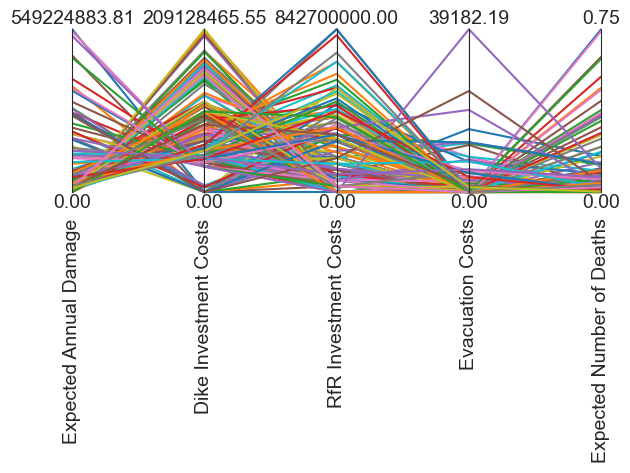

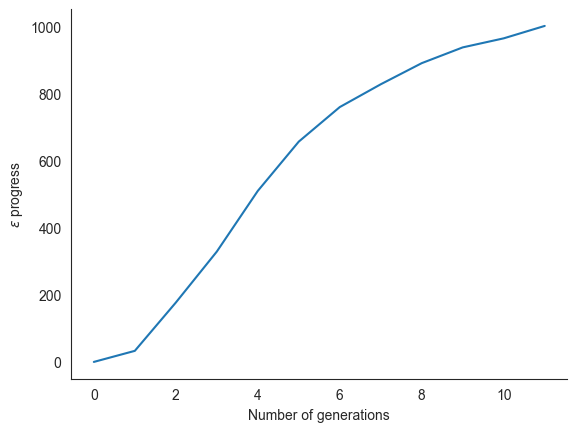

Done: 159 solutions found.
Running optimization with epsilon=750, nfe=20000, population=20...


[MainProcess/INFO] pool started with 12 workers
  6%|██                                   | 1100/20000 [02:24<44:22,  7.10it/s][MainProcess/INFO] terminating pool


KeyboardInterrupt: 

In [41]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Define search space
    epsilon_values = [1000]
    nfe_values = [20000]
    population_size = 20

    scenario_dict = favourable_scenarios_df.iloc[0].to_dict()
    scenario = Scenario("favourable_0", **scenario_dict)

    # Run the sweep
    all_results = sweep_optimization(epsilon_values, nfe_values, scenario, population_size)

    # Example: show one result
    first_key = list(all_results.keys())[0]
    results = all_results[first_key]["results"]

    outcomes = results.loc[:, [
        'Expected Annual Damage',
        'Dike Investment Costs',
        'RfR Investment Costs',
        'Evacuation Costs',
        'Expected Number of Deaths'
    ]]

    limits = parcoords.get_limits(outcomes)
    axes = parcoords.ParallelAxes(limits)
    axes.plot(outcomes)
    plt.title(f"Results for {first_key}")
    plt.show()


In [43]:
all_results

{'eps_1000.0_nfe_5000_pop_50': {'results':     0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
  0         0        0        1        0        0        0        1        1   
  1         0        0        0        0        0        0        1        0   
  2         0        0        0        0        0        0        0        0   
  3         0        0        0        0        0        0        0        0   
  4         0        1        1        0        0        0        1        0   
  ..      ...      ...      ...      ...      ...      ...      ...      ...   
  78        0        0        0        0        0        0        0        1   
  79        0        0        0        0        0        0        1        1   
  80        0        0        0        0        0        0        1        1   
  81        0        1        0        0        0        0        1        1   
  82        0        0        1        0        0        0        0        0   

In [45]:
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,0,1,0,0,0,1,1,0,0,...,0,1,2,0,0,4.437517e+06,1.154770e+08,146000000.0,388.911761,0.000815
1,0,0,0,0,0,0,1,0,0,0,...,6,1,2,0,0,1.984322e+07,1.073074e+08,30700000.0,0.000000,0.024588
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5.423093e+07,1.034714e+08,0.0,0.000000,0.077748
3,0,0,0,0,0,0,0,0,0,0,...,6,6,3,0,0,8.706660e+06,1.643461e+08,0.0,0.000000,0.025684
4,0,1,1,0,0,0,1,0,0,0,...,1,2,0,0,0,1.533975e+07,7.405789e+07,442300000.0,1353.590961,0.002756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3.988009e+08,6.320800e+06,151900000.0,36008.819758,0.064336
79,0,0,0,0,0,0,1,1,1,0,...,1,2,0,0,0,2.372696e+08,1.390342e+07,92100000.0,0.000000,0.316497
80,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,3.898899e+07,5.967937e+07,213300000.0,0.000000,0.052216
81,0,1,0,0,0,0,1,1,0,0,...,0,1,3,0,0,1.529881e+07,1.040292e+08,146000000.0,0.000000,0.022841
